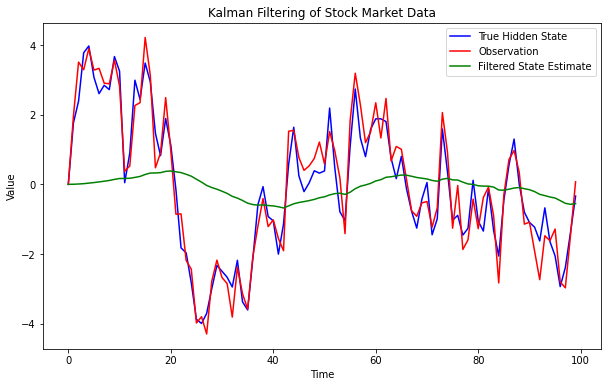

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data
np.random.seed(0)
T = 100  # Number of time steps
dt = 1.0  # Time step size
hidden_state = np.zeros((T,))
observation = np.zeros((T,))

# Simulate true hidden state and noisy observations
for t in range(1, T):
    hidden_state[t] = 0.8 * hidden_state[t-1] + np.random.randn()
    observation[t] = hidden_state[t] + 0.5 * np.random.randn()

# Kalman filtering
# Initialize parameters
Q = 1e-5  # Process noise covariance
R = 0.1**2  # Measurement noise covariance
x = np.zeros((T,))  # Initial state estimate
P = np.zeros((T,))  # Initial state covariance estimate
K = np.zeros((T,))  # Kalman gain

for t in range(1, T):
    # Prediction step
    x[t] = x[t-1]
    P[t] = P[t-1] + Q

    # Update step
    K[t] = P[t] / (P[t] + R)
    x[t] = x[t] + K[t] * (observation[t] - x[t])
    P[t] = (1 - K[t]) * P[t]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hidden_state, color='b', label='True Hidden State')
plt.plot(observation, color='r', label='Observation')
plt.plot(x, color='g', label='Filtered State Estimate')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filtering of Stock Market Data')
plt.show()
